# ***California Housing***

# **1. Define the Problem**
   - Clear problem statement
   - Identify the type of problem (classification, regression, clustering, etc.)

We want to make predictions on the housing price on the California area.
For that we will be using a SVM Regressor. As we have +10k samples, sklearn recommends using LinearSVR that does not rely on libsvm

# **2. Data Collection**
   - Search for data sources
   - Acquire and store data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = "datasets/housing/housing.csv"

housing = pd.read_csv(filepath)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **3. Exploratory Data Analysis (EDA)**
   - Descriptive statistical analysis (means, medians, standard deviations, etc.)
   - Visualizations (histograms, bar charts, boxplots, correlation matrices, etc.)
   - Identify missing data
   - Detect outliers

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


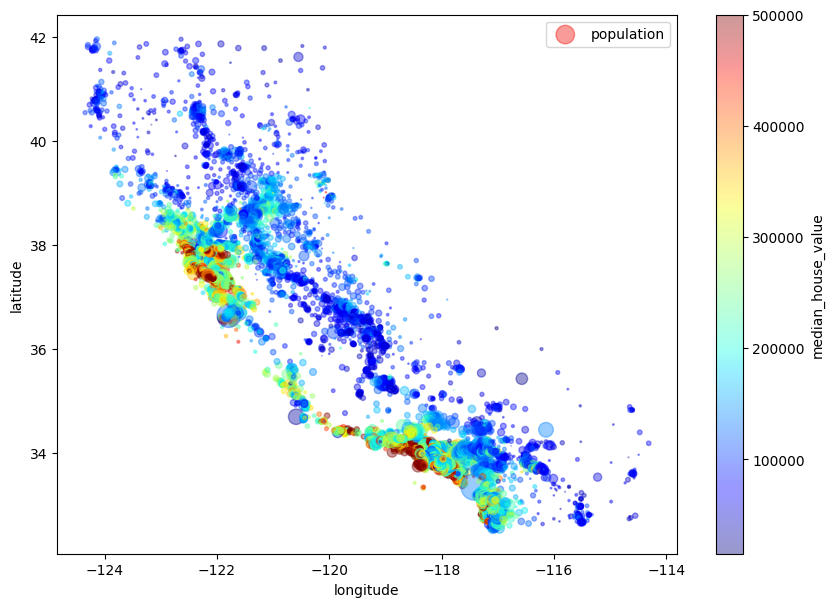

In [5]:
# Plot coordinates as X, y, plot median_house_value as color, and population as size

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

Numerical columns:  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical columns:  ['ocean_proximity']


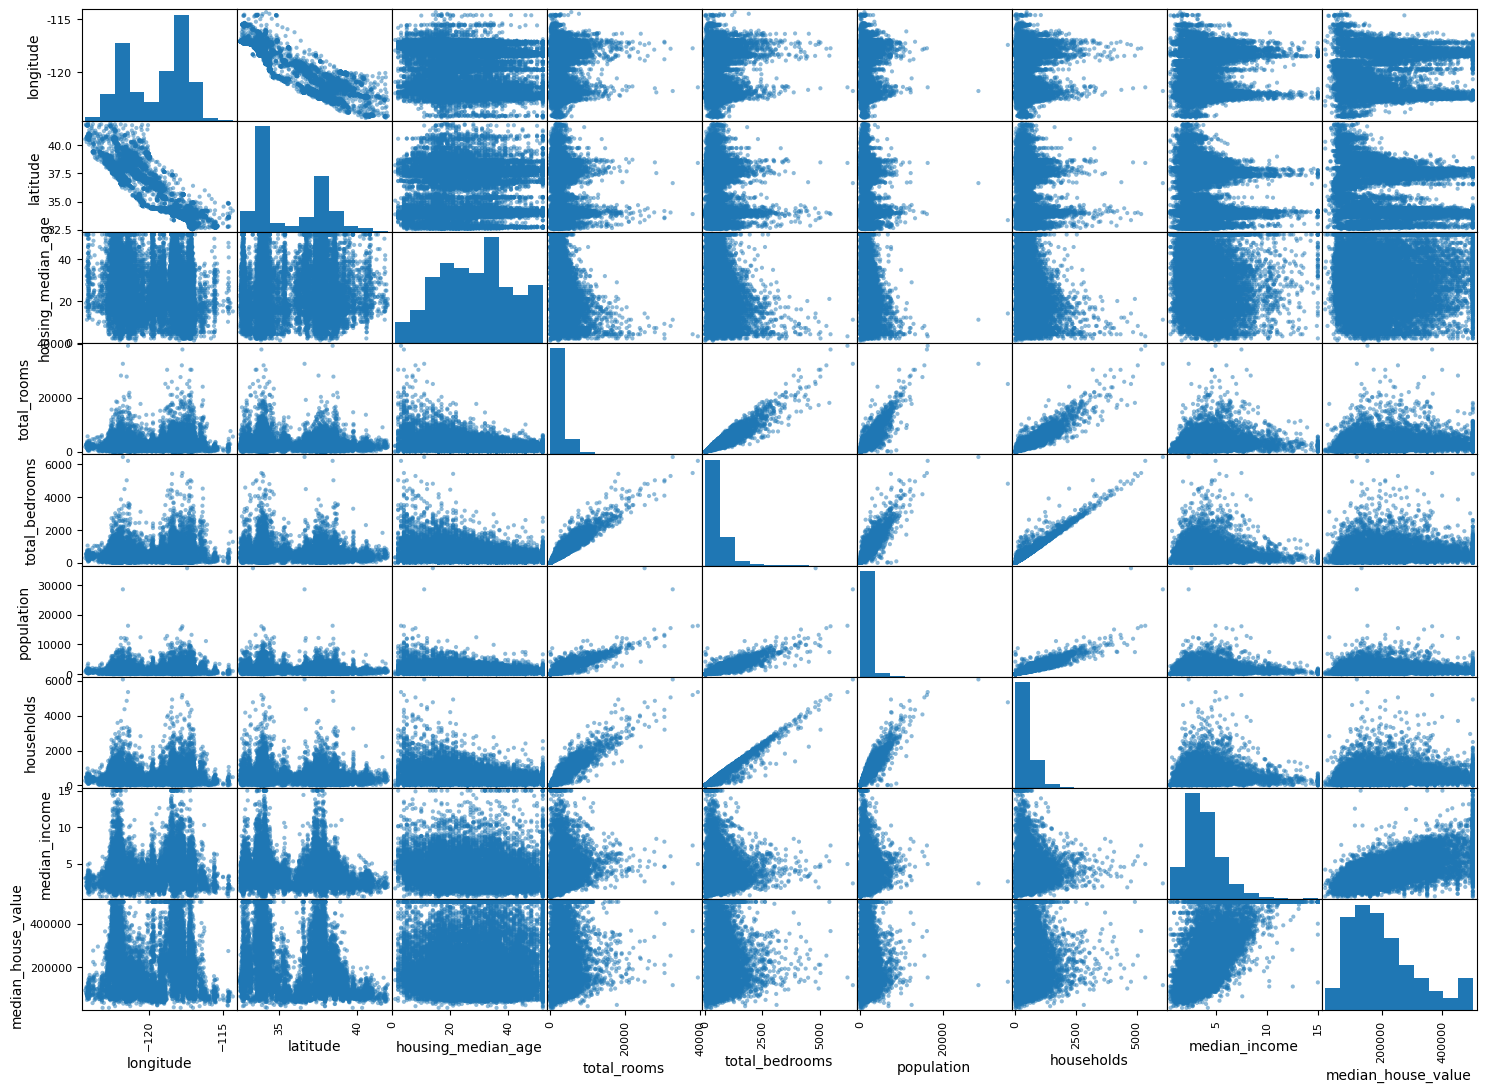

In [6]:
numeric_cols = list(housing.select_dtypes(include=["float64"]).columns)
numeric_cols.remove("median_house_value")
cat_cols = list(housing.select_dtypes(include=["object"]).columns)

print("Numerical columns: ", numeric_cols)
print("Categorical columns: ", cat_cols)

# Plot scatter matrix
from pandas.plotting import scatter_matrix

scatter_matrix(housing, figsize=(18, 13))
plt.show()

In [7]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#  **4. Data Splitting**
   - Split the data into training, validation (and/or cross-validation), and test sets

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64


In [9]:
# Print head of each
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


# **5. Data Preprocessing + Feature Engineering + Pipelines**
   - Data cleaning (handle missing data, outlier removal, etc.)
   - Variable transformations (normalization, standardization, encoding categorical variables, etc.)
   - Dimensionality reduction (PCA, t-SNE, etc. if necessary)
   - Create pipelines that combine preprocessing and modeling steps to automate and streamline the process
   - Creation of new features from existing ones
   - Feature selection (remove uninformative or redundant features)
   - Convert temporal or cyclical variables (e.g., dates)

In [10]:
# Missing data -> SimpleImputer
# Standardization -> StdScaler
# Categorical features -> ocean_proximity using OrdinalEncoder
# No outliers
# No dim reduction

### Numerical pipeline

In [11]:
# Numerical pipeline
# 1. FeatureAdder
# 2. Imputer + StandardScaler

print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')


In [12]:

from sklearn.base import BaseEstimator, TransformerMixin

class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, rooms_per_household=True, population_per_household=True, bedrooms_per_room=True):
        self.rooms_per_household = rooms_per_household
        self.population_per_household = population_per_household
        self.bedrooms_per_room = bedrooms_per_room

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None, rooms_per_household=True, population_per_household=True, bedrooms_per_room=True):
        rooms_idx = 3
        bedrooms_idx = 4
        population_idx = 5
        households_idx = 6

        if rooms_per_household:
            rooms_per_household = X[:, rooms_idx] / X[:, households_idx]
            X = np.c_[X, rooms_per_household]
        if population_per_household:
            population_per_household = X[:, population_idx] / X[:, households_idx]
            X = np.c_[X, population_per_household]
        if bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            X = np.c_[X, bedrooms_per_room]
        return X

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_transformer_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('feature_adder', FeatureAdder()),
    ('std_scaler', StandardScaler())
])

num_col_transformer = ColumnTransformer([
    ('num_transformer', num_transformer_pipeline, numeric_cols)
])

# Test on first 5 rows. Use a ColumnTransformer to apply the pipeline to the numerical columns
sample = housing.iloc[:5]
num_col_transformer.fit_transform(sample)


array([[ 0.68599434,  1.88648444, -0.21529553, -0.68267033, -0.71456392,
        -0.7084169 , -0.67899553,  0.96018595,  0.30205618,  0.45066303,
        -0.5779356 ],
       [ 1.54348727,  0.17149859, -1.87141502,  1.98848027,  1.98091466,
         1.98704197,  1.98641748,  0.94634053, -0.55730934, -1.2788349 ,
        -0.09865818],
       [-0.17149859, -0.68599434,  0.69557019, -0.43054532, -0.54626894,
        -0.48282294, -0.54467135,  0.33900345,  1.80424815,  1.40794705,
        -1.46690931],
       [-1.02899151, -0.68599434,  0.69557019, -0.51344162, -0.42211691,
        -0.40243888, -0.43405145, -0.60010022, -1.04204584,  0.42113267,
         1.39356774],
       [-1.02899151, -0.68599434,  0.69557019, -0.361823  , -0.29796488,
        -0.39336326, -0.32869915, -1.64542971, -0.50694915, -1.00090785,
         0.74993535]])

### Categorical pipeline

In [14]:
# Print different values of cat_cols
housing[cat_cols].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

In [15]:
# As the different values dont represent any order, we use one-hot encoding

from sklearn.preprocessing import OneHotEncoder


cat_transformer_pipeline = Pipeline([
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

cat_col_transformer = ColumnTransformer([
    ("cat", cat_transformer_pipeline, cat_cols)
], remainder="drop")

# Test on df. Print the result with the encoded features
sample_tr = cat_col_transformer.fit_transform(housing)
sample_tr[:, 0:10]

# Print the new feature names
print(cat_col_transformer.named_transformers_["cat"].named_steps["ohe"].categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


### Final pipeline

In [16]:
# Create a pipeline that combines num_col_transformer and cat_col_transformer

preprocessing_pipeline = ColumnTransformer([
    ("num", num_col_transformer, numeric_cols),
    ("cat", cat_col_transformer, cat_cols)
])

# Test on sample
sample = housing.sample(5, random_state=42)
preprocessing_pipeline.fit_transform(sample)


c:\Users\Fco\miniconda3\envs\handsonml\lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['total_bedrooms']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


array([[ 0.83689229,  0.0660999 , -0.56544663, -1.58855347, -0.06821876,
        -0.97515324, -1.28439146,  0.1241073 ,  0.40387991,  1.84709734,
         0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.5476438 , -0.69404898, -0.13707797,  0.26712475,  0.7185709 ,
         0.08582103, -0.66041374,  1.19696078,  0.64214731, -0.15353142,
         0.        ,  1.        ,  0.        ,  0.        ],
       [-1.36782395,  1.50377279,  1.74774412,  1.41176076, -0.44114796,
         1.87297324,  0.03601029,  0.94784913,  1.2804209 , -1.11904086,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.02329687, -1.40462294, -1.25083648,  0.40649418,  1.3552793 ,
        -0.33385324,  1.69302677, -1.3337971 , -1.36180624, -0.01581499,
         1.        ,  0.        ,  0.        ,  0.        ],
       [-1.040009  ,  0.52879922,  0.20561696, -0.49682623, -1.56448348,
        -0.6497878 ,  0.21576814, -0.9351201 , -0.96464187, -0.55871007,
         0.        ,  0.  

# **8. Model Selection**
   - Based on the nature of the problem, select one or several ML algorithms
   - Establish an evaluation metric

In [17]:
housing.shape

(20640, 11)

In [25]:
# LinearSVR

from sklearn.svm import LinearSVR
from sklearn.model_selection import RandomizedSearchCV

clf = LinearSVR()

clf_pipeline = Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('clf', clf)
])

# LinearSVR param grid
param_grid = {
    'clf__C': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    'clf__epsilon': [0.001, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100],
    'clf__max_iter': [1000, 10000, 100000],
    'clf__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
    'preprocess__num__num_transformer__feature_adder__rooms_per_household': [True, False],
    'preprocess__num__num_transformer__feature_adder__population_per_household': [True, False],
    'preprocess__num__num_transformer__feature_adder__bedrooms_per_room': [True, False],
}

grid_search = RandomizedSearchCV(clf_pipeline, param_grid, cv=5, n_iter=20, scoring='neg_mean_squared_error', verbose=5, n_jobs=-1, error_score="raise")

In [26]:
# Create train and test from strat_train_set and strat_test_set

X_train = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"].copy()
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Print shapes
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (16512, 9)
y_train.shape:  (16512,)
X_test.shape:  (4128, 9)
y_test.shape:  (4128,)


# **9. Model Training**
   - Train the model using the training set
   - Use techniques like regularization to prevent overfitting

In [27]:
# Fit the GS
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\Fco\miniconda3\envs\handsonml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Fco\miniconda3\envs\handsonml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               ColumnTransformer(transformers=[('num_transformer',
                                                                                                                Pipeline(steps=[('imputer',
                                                                                                                                 SimpleImputer(strategy='median')),
                                                                                                                                ('feature_adder',
                                                                                                                                 FeatureAdder()),
                                                                                                                                ('std_scaler',
                                                                                                                                 StandardScaler())]),
                                                                                                                ['longitude',
                                                                                                                 'latitude',
                                                                                                                 'housing_median_age',
                                                                                                                 'to...
                                                      'squared_epsilon_insensitive'],
                                        'clf__max_iter': [1000, 10000, 100000],
                                        'preprocess__num__num_transformer__feature_adder__bedrooms_per_room': [True,
                                                                                                               False],
                                        'preprocess__num__num_transformer__feature_adder__population_per_household': [True,
                                                                                                                      False],
                                        'preprocess__num__num_transformer__feature_adder__rooms_per_household': [True,
                                                                                                                 False]},
                   scoring='neg_mean_squared_error', verbose=5)

# **10. Model Evaluation**
   - Evaluate the model on the validation set
   - Adjust hyperparameters if necessary
   - Repeat steps 7 and 8 as needed until satisfactory model performance is achieved

In [28]:
# Get the best model
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  ColumnTransformer(transformers=[('num_transformer',
                                                                                   Pipeline(steps=[('imputer',
                                                                                                    SimpleImputer(strategy='median')),
                                                                                                   ('feature_adder',
                                                                                                    FeatureAdder(population_per_household=False,
                                                                                                                 rooms_per_household=False)),
                                                                                                   ('std_scaler',
                                                                                                    StandardScaler())]),
                                                                                   ['longitude',
                                                                                    'latitude',
                                                                                    'housing_median_age',
                                                                                    '...
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  ColumnTransformer(transformers=[('cat',
                                                                                   Pipeline(steps=[('ohe',
                                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                                   ['ocean_proximity'])]),
                                                  ['ocean_proximity'])])),
                ('clf',
                 LinearSVR(C=1, epsilon=10, loss='squared_epsilon_insensitive',
                           max_iter=10000))])

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

r2 = r2_score(y_test, y_pred)
print('R2: {:.2f}'.format(r2))

RMSE: 66935.03
R2: 0.66


# **10. Testing and Deployment**
   - Evaluate the model on the test set
   - Interpret results and performance metrics